# US

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle


Using TensorFlow backend.
[2017-11-20 11:47:17,177] Making new env: MountainCarContinuous-v0


In [3]:
def plot_memory(memory):
    plt.figure(1, figsize=(13,20))
    plt.xlabel("position")
    plt.ylabel("velocity")
    plt.title("Content of the replay buffer")

    actions = []
    states = []
    rewards = []

    for experience in memory.dump():
        actions.append(experience.action)
        states.append(experience.state0)
        rewards.append(experience.reward)
    states = np.array(states)
    #sb.distplot(actions, kde=False)
    #sb.jointplot(states[:,0], states[:,1], kind="hex", stat_func=None)
    plt.set_cmap('jet')
    plt.scatter(states[:,0], states[:,1], s=1, c=rewards)
    plt.colorbar(label="rewards")
    plt.show()
    return rewards

In [14]:
def plot_new_memory(mem):
    plt.figure(1, figsize=(13,20))
    plt.xlabel("position")
    plt.ylabel("velocity")
    plt.title("Content of the replay buffer")
    
    vec = mem.buffer.contents
    print(vec)
    
    states = vec['state0'].data
    rewards = vec['reward'].data
 
    states = np.array(states)
    plt.set_cmap('jet')
    plt.scatter(states[:,0], states[:,1], s=1, c=rewards)
    plt.colorbar(label="rewards")
    plt.show()
    return rewards

{'state0': <memory.RingBuffer object at 0x7fda850df710>, 'action': <memory.RingBuffer object at 0x7fda850df6d8>, 'state1': <memory.RingBuffer object at 0x7fda850df6a0>, 'reward': <memory.RingBuffer object at 0x7fda850df5c0>, 'terminal1': <memory.RingBuffer object at 0x7fda850df780>}


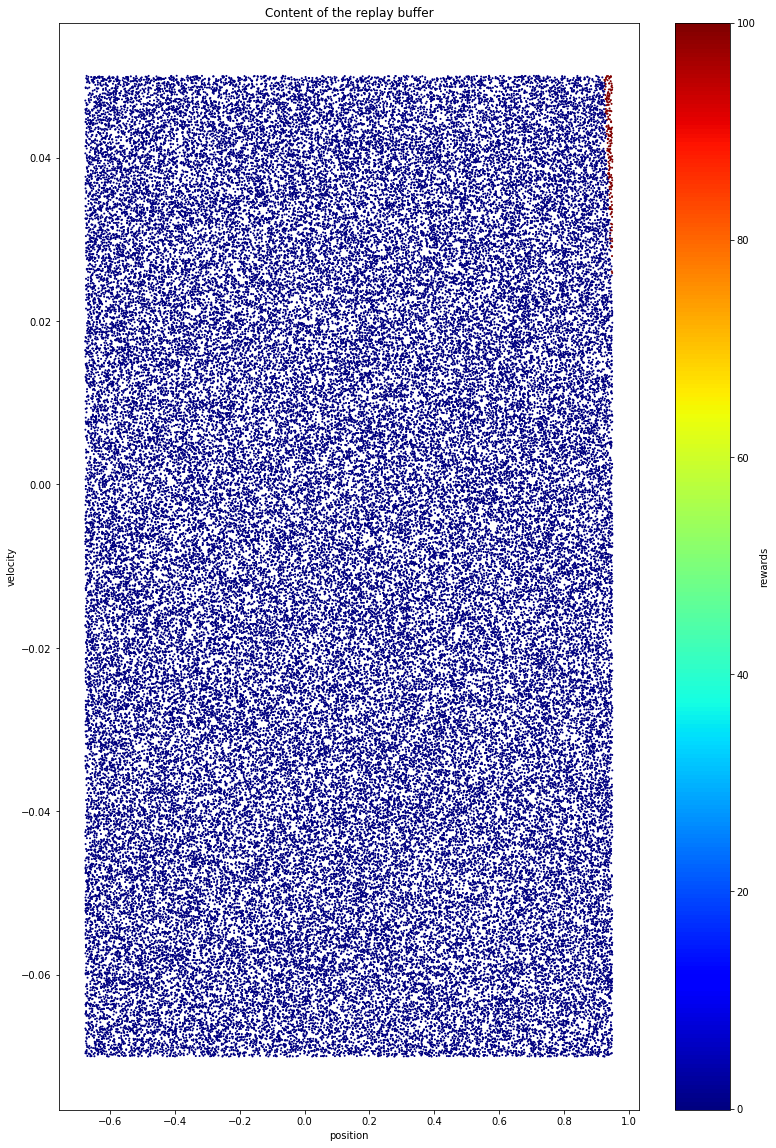

In [15]:
from memory import Memory
from env_wrapper import ContinuousMCWrapper

path = "data/replay_buffer_us_sparse_big.p"
memory = get_memory(path)

wrapper = ContinuousMCWrapper()
mem = Memory(wrapper, with_reward=True, limit=memory.buffer.maxlen)

for idx in range(memory.buffer.length):
    sample = memory.buffer.__getitem__(idx)
    #print (sample)
    
    buffer_item = {'state0': sample.state0,
                    'action': sample.action,
                    'reward': sample.reward,
                    'state1': sample.state1,
                    'terminal1': sample.terminal1}

    mem.append(buffer_item,training=True)

rewards = plot_new_memory(mem)

In [10]:
cpt = 0
for i in rewards:
    if i>0:
        cpt +=1
print (cpt)
print (len(rewards))

10
106521
